In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from pandas.plotting import boxplot
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve



In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/ml_clean_data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age  fnlwght  education_num_yr  cap_gain  cap_loss  hours_per_week  \
0   39    77516                13      2174         0              40   
1   50    83311                13         0         0              13   
2   38   215646                 9         0         0              40   
3   53   234721                 7         0         0              40   
4   28   338409                13         0         0              40   

   income_outcome  age_range_ord  education_level_ord  workclass_Federal-gov  \
0               0              2                    6                      0   
1               0              2                    6                      0   
2               0              2                    3                      0   
3               0              2                    2                      0   
4               0              2                    6                      0   

   ...  origin_descent_Asia  origin_descent_Carib  \
0  ...                    0                     0   
1  ...                    0                     0   
2  ...                    0                     0   
3  ...                    0                     0   
4  ...                    0                     1   

   origin_descent_Central America  origin_descent_Europe  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   origin_descent_North America  origin_descent_South America  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   origin_descent_United States  age_range_adult  age_range_child  \
0                             1                1                0   
1                             1                1                0   
2                             1                1                0   
3                             1                1                0   
4                             0                1                0   

   age_range_senior  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 66 columns]

In [5]:
ml_data.dtypes

age                             int64
fnlwght                         int64
education_num_yr                int64
cap_gain                        int64
cap_loss                        int64
                                ...  
origin_descent_South America    int64
origin_descent_United States    int64
age_range_adult                 int64
age_range_child                 int64
age_range_senior                int64
Length: 66, dtype: object

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             30072 non-null  int64
 1   fnlwght                         30072 non-null  int64
 2   education_num_yr                30072 non-null  int64
 3   cap_gain                        30072 non-null  int64
 4   cap_loss                        30072 non-null  int64
 5   hours_per_week                  30072 non-null  int64
 6   income_outcome                  30072 non-null  int64
 7   age_range_ord                   30072 non-null  int64
 8   education_level_ord             30072 non-null  int64
 9   workclass_Federal-gov           30072 non-null  int64
 10  workclass_Local-gov             30072 non-null  int64
 11  workclass_Private               30072 non-null  int64
 12  workclass_Self-emp-inc          30072 non-null  int64
 13  w

In [7]:
ml_df = ml_data.copy()

In [8]:
ml_df.shape

(30072, 66)

In [9]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html



ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    

if 'level_of_employ_PT' in ml_df:
    del ml_df['level_of_employ_PT'] 
    X = ml_df.values 
    
if 'sex_Female' in ml_df:
    del ml_df['sex_Female'] 
    X = ml_df.values 
    
if 'origin_descent_us_0' in ml_df:
    del ml_df['origin_descent_us_0'] 
    X = ml_df.values 

if 'marital_stat_Unmarried' in ml_df:
    del ml_df['marital_stat_Unmarried'] 
    X = ml_df.values 






In [10]:
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [11]:
ml_df.shape

(30072, 61)

====Iteration 0  ====

Accuracy:  0.8472152950955943 

f1_score: 0.6622565233370085 

precision_score: 0.7421746293245469 

roc_auc_score: 0.7642222276522046 

Confusion Matrix: 

      0    1
0  4195  313
1   606  901 

Train Time:  0.6113531299999999 s

====Iteration 1  ====

Accuracy:  0.8462177888611804 

f1_score: 0.6657029273581496 

precision_score: 0.7463533225283631 

roc_auc_score: 0.7654739418644353 

Confusion Matrix: 

      0    1
0  4169  313
1   612  921 

Train Time:  1.224631493 s

====Iteration 2  ====

Accuracy:  0.8540315876974232 

f1_score: 0.6779163609684519 

precision_score: 0.7598684210526315 

roc_auc_score: 0.7735518298285202 

Confusion Matrix: 

      0    1
0  4213  292
1   586  924 

Train Time:  1.1947179969999997 s



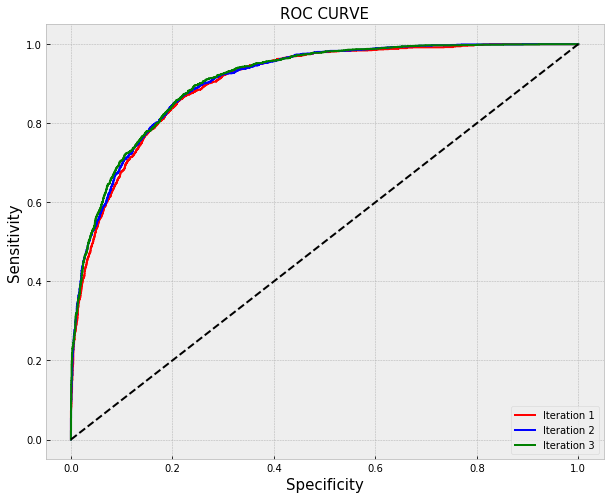

In [12]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
##https://docs.python.org/3/library/time.html#functions

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


#lr_clf = LogisticRegression(penalty='elasticnet', C=1.0, class_weight=None, solver='saga', l1_ratio = 0.5 )
lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    t = time.process_time()
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions
    
    elapsed_time = time.process_time() - t
    

    # now let's get the accuracy and confusion matrix for these iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [13]:
weights

array([[ 4.89837261e-01,  8.49615226e-02,  9.52597437e-01,
         2.36108713e+00,  2.71204280e-01,  2.36336607e-01,
        -3.52611139e-02, -9.73372324e-02,  8.07735319e-02,
        -2.30447551e-02,  3.38762878e-02,  7.42375808e-02,
        -9.04612453e-02, -4.51549960e-02, -1.26734128e-01,
        -7.90125624e-03, -2.15853304e-02, -1.45192916e-02,
         2.39979488e-01, -1.63904361e-01, -1.41691441e-01,
        -8.71816124e-02, -2.55707229e-01, -2.22623109e-01,
         1.65800002e-01,  7.12644959e-02,  7.04558066e-02,
         1.10493241e-01, -3.50083289e-02,  4.80807487e-01,
        -2.18138697e-01, -1.11587473e-01, -5.26832656e-01,
        -1.44150410e-01,  5.17986128e-01,  4.18298767e-01,
        -3.59025735e-04,  2.06457077e-01, -6.06519309e-02,
        -5.40376392e-02,  6.27794783e-02,  1.92176916e-03,
        -2.13138057e-02,  7.07054015e-02,  2.76241708e-02,
         2.14966223e-01, -3.42402868e-02,  5.63439870e-02,
        -4.13742342e-02, -2.82442522e-02,  2.56426690e-0

In [14]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [15]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
Xnew = ml_df[['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    iter_num =+1
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8382377389858686 

f1_score: 0.6301786393006462 

precision_score: 0.7121993127147767 

roc_auc_score: 0.7457200450365383 

Confusion Matrix: 

      0    1
0  4213  335
1   638  829 

Train Time:  0.11932819799999983 s

====Iteration 1  ====

Accuracy:  0.8354114713216958 

f1_score: 0.6308724832214766 

precision_score: 0.7175572519083969 

roc_auc_score: 0.7445355300038221 

Confusion Matrix: 

      0    1
0  4179  333
1   657  846 

Train Time:  0.33856318400000074 s

====Iteration 2  ====

Accuracy:  0.8347464671654198 

f1_score: 0.6361639824304539 

precision_score: 0.7302521008403361 

roc_auc_score: 0.7458949546827006 

Confusion Matrix: 

      0    1
0  4152  321
1   673  869 

Train Time:  0.33045585800000055 s



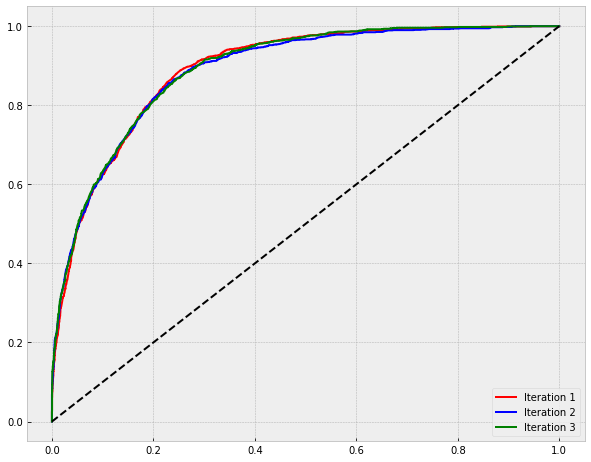

In [16]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    
    t = time.process_time()
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])
    
    elapsed_time = time.process_time() - t
    


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    f1_scor_ = mt.f1_score(y[test_indices],y_hat)
    prec_scor_ = mt.precision_score(y[test_indices], y_hat)
    auc_scor_ = mt.roc_auc_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [17]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4




svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num += 1
    
    

====Iteration 0  ====

Accuracy:  0.8500415627597673 

f1_score: 0.6636838180462341 

precision_score: 0.7523245984784447 

roc_auc_score: 0.7644243638067538 

Confusion Matrix: 

      0    1
0  4223  293
1   609  890 

Train Time:  33.575089078000005 s

====Iteration 1  ====

Accuracy:  0.8603491271820449 

f1_score: 0.6870342771982115 

precision_score: 0.7676935886761033 

roc_auc_score: 0.7800752601266845 

Confusion Matrix: 

      0    1
0  4253  279
1   561  922 

Train Time:  35.41896537 s

====Iteration 2  ====

Accuracy:  0.8403990024937655 

f1_score: 0.6457564575645757 

precision_score: 0.7231404958677686 

roc_auc_score: 0.7545681063122924 

Confusion Matrix: 

      0    1
0  4180  335
1   625  875 

Train Time:  34.365252166000005 s



In [18]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for (train_indices, test_indices) in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

In [19]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions




# lets investigate SVMs on the data and play with the parameters and kernels


# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
t = time.process_time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

elapsed_time = time.process_time() - t


acc = mt.accuracy_score(y_test,y_hat)
f1_scor_ = mt.f1_score(y_test,y_hat)
prec_scor_ = mt.precision_score(y_test, y_hat)
auc_scor_ = mt.roc_auc_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print("Accuracy: ", acc, "\n" )
print("f1_score:", f1_scor_, "\n")
print("precision_score:",prec_scor_ , "\n")
print("roc_auc_score:",auc_scor_ , "\n")
print("Confusion Matrix: \n")
print (pd.DataFrame(conf),"\n")
print("Train Time: ", elapsed_time,  "s\n")





Accuracy:  0.8433915211970074 

f1_score: 0.6534216335540839 

precision_score: 0.74 

roc_auc_score: 0.7578003253816116 

Confusion Matrix: 

      0    1
0  4185  312
1   630  888 

Train Time:  34.524728813999985 s



In [20]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8365, 61)
(8365,)
[4191 4174]


[[ 2.41843954e-01  4.78583929e-02  6.53737547e-01  1.82447364e+00
   1.90648747e-01  1.40983147e-01 -5.26954090e-02 -5.97232169e-02
   3.85124607e-02 -1.27493701e-02  2.37683337e-02  5.18666747e-02
  -6.52881535e-02 -2.56786122e-02 -1.33478002e-02 -4.28138690e-02
  -5.63298660e-03 -7.41986498e-02  2.00264178e-01 -1.16093834e-01
  -8.81511979e-02 -7.57759983e-02 -1.56615905e-01 -7.96583773e-02
   1.46051914e-01  3.56568326e-02  7.39107312e-02  9.35156116e-02
  -5.30217707e-02  3.56039537e-01 -2.21763840e-01 -6.81911391e-02
  -2.36222541e-01 -1.34809973e-01  2.77598409e-01  1.67491651e-01
   3.06310532e-03  1.11338310e-01 -5.75453484e-02  3.27737282e-02
   7.62221596e-02 -4.67033495e-02 -1.03972231e-02  1.26976341e-01
  -3.84260320e-02  1.53599330e-01 -2.26998665e-02  2.99035216e-02
  -4.40496571e-03 -3.65913589e-02  4.82931237e-03 -5.20850171e-02
  -1.74645321e-02 -3.22634578e-02 -3.01976109e-03 -2.82005243e-03
  -2.32343721e-02  3.06310532e-03  5.35343706e-02 -7.10542736e-14
  -6.27609

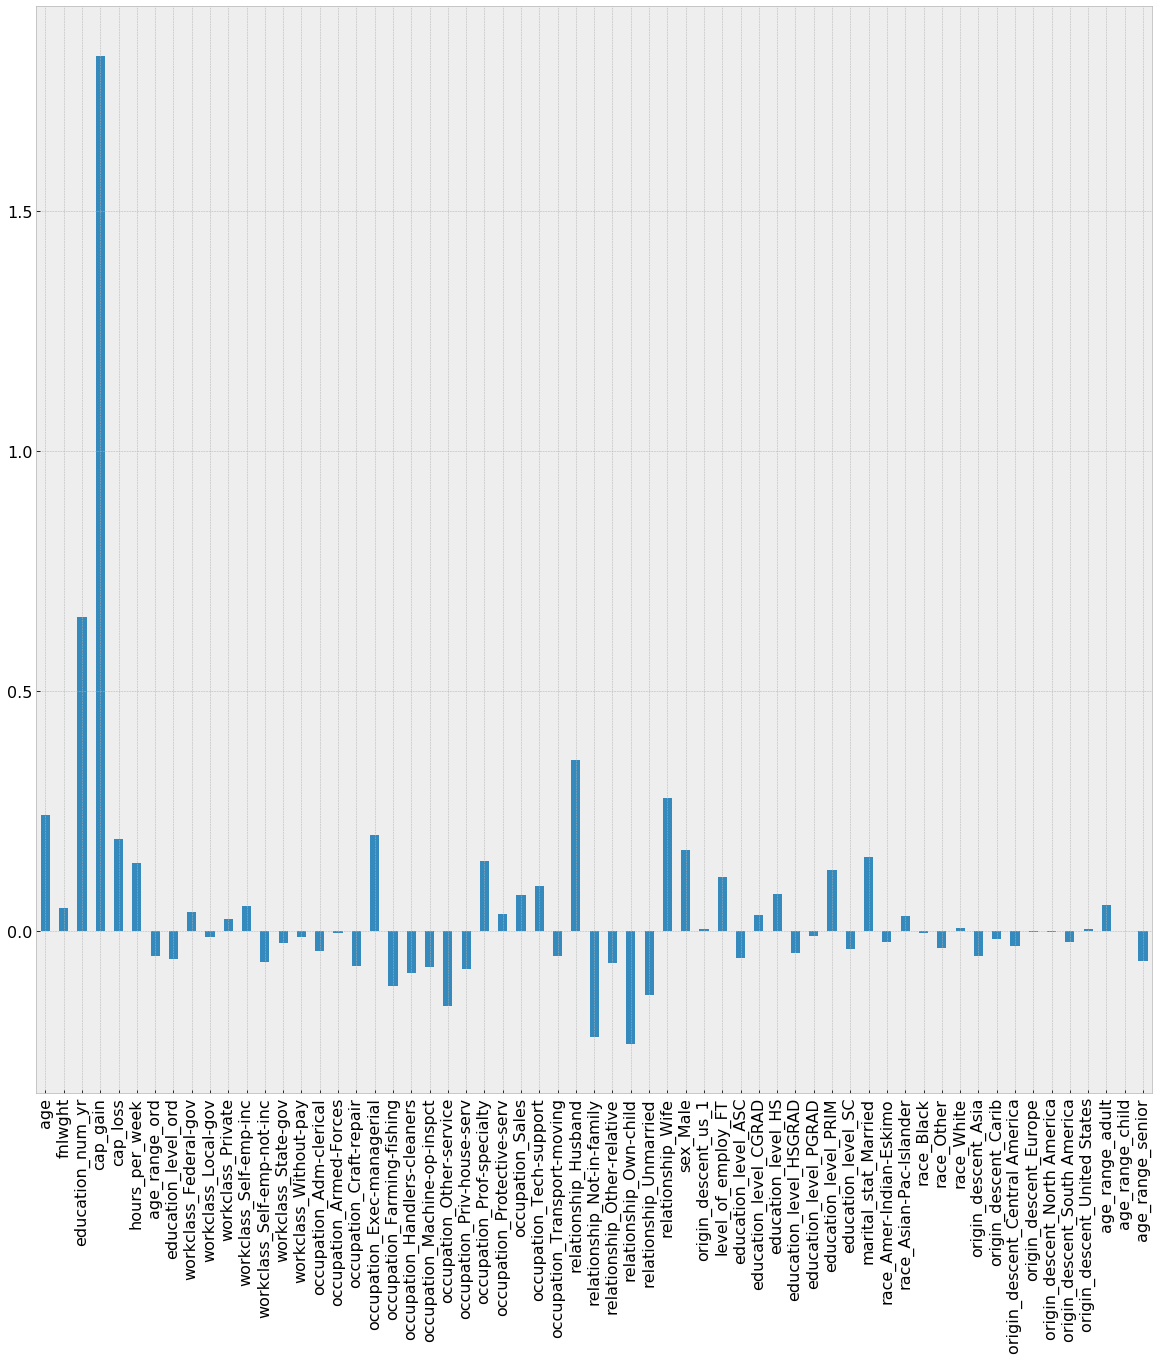

In [21]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [22]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the income_outcomw Column to the pandas support vectors dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8365 entries, 16291 to 22218
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             8365 non-null   int64
 1   fnlwght                         8365 non-null   int64
 2   education_num_yr                8365 non-null   int64
 3   cap_gain                        8365 non-null   int64
 4   cap_loss                        8365 non-null   int64
 5   hours_per_week                  8365 non-null   int64
 6   age_range_ord                   8365 non-null   int64
 7   education_level_ord             8365 non-null   int64
 8   workclass_Federal-gov           8365 non-null   int64
 9   workclass_Local-gov             8365 non-null   int64
 10  workclass_Private               8365 non-null   int64
 11  workclass_Self-emp-inc          8365 non-null   int64
 12  workclass_Self-emp-not-inc      8365 non-null   int64
 13

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 720x288 with 0 Axes>

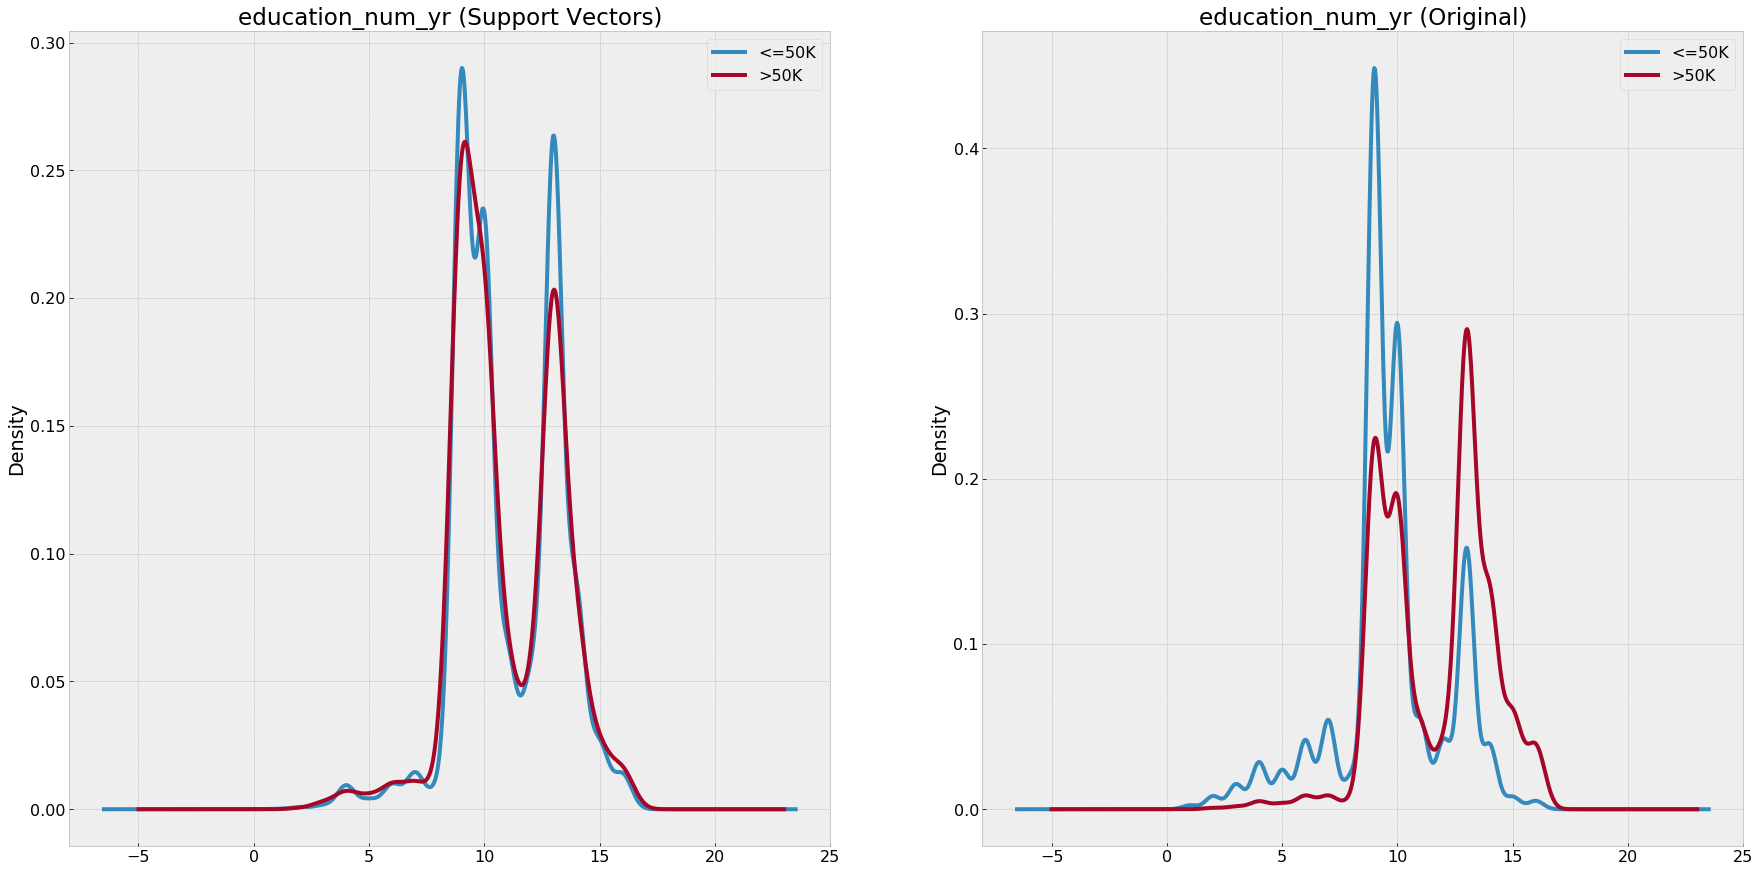

<Figure size 720x288 with 0 Axes>

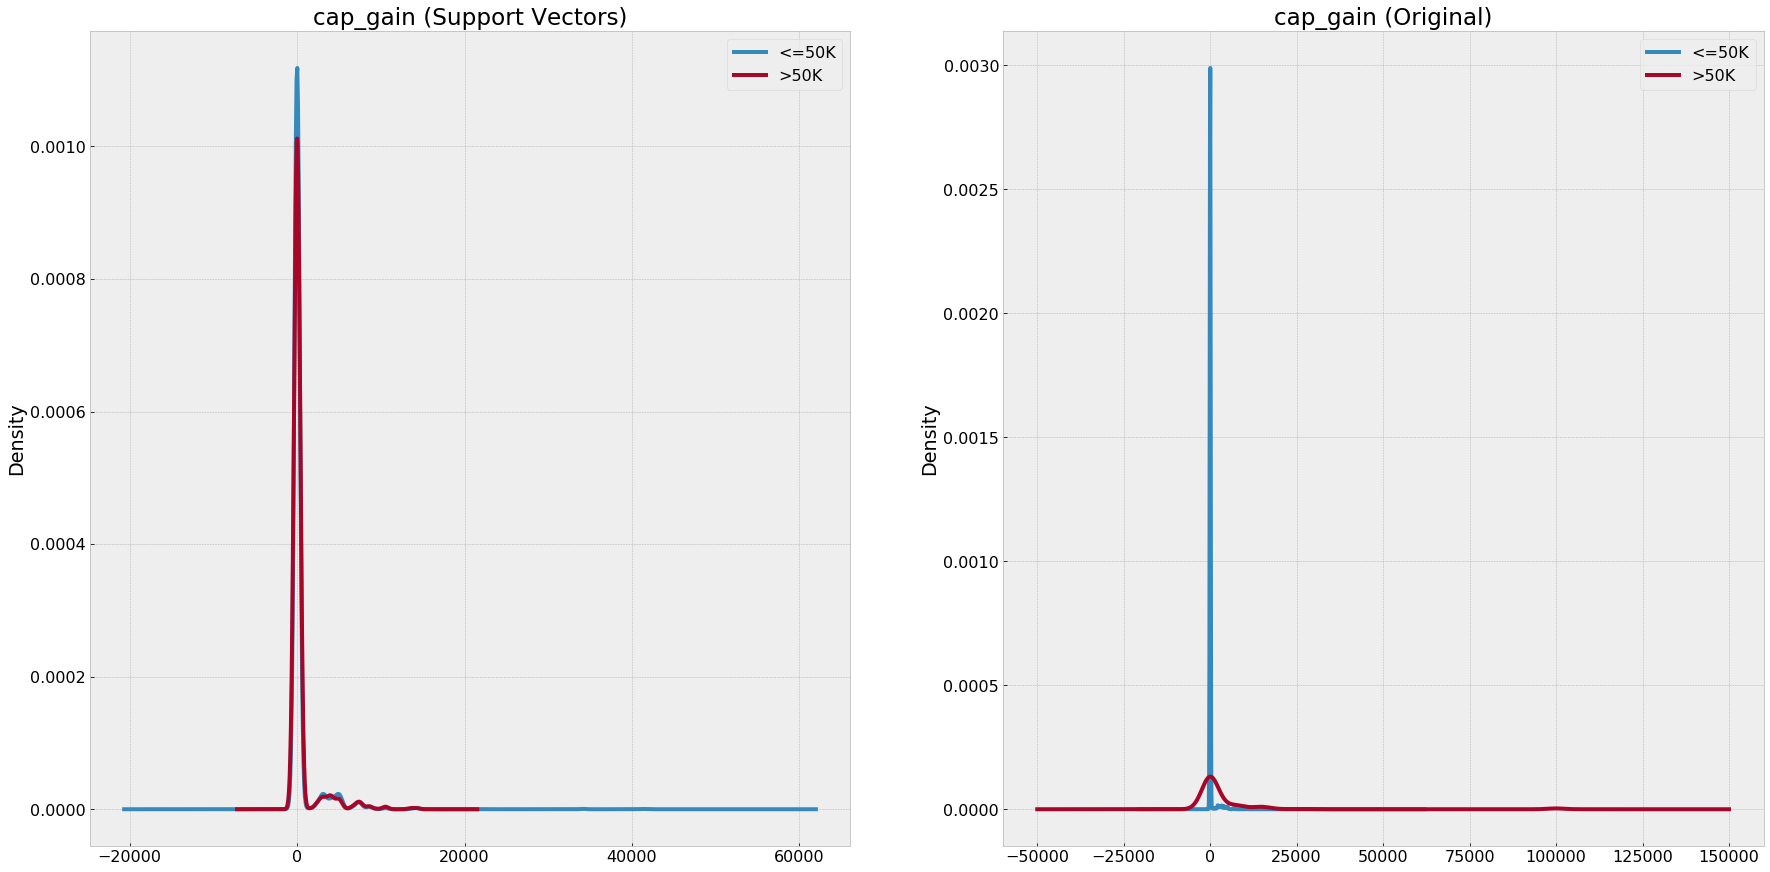

<Figure size 720x288 with 0 Axes>

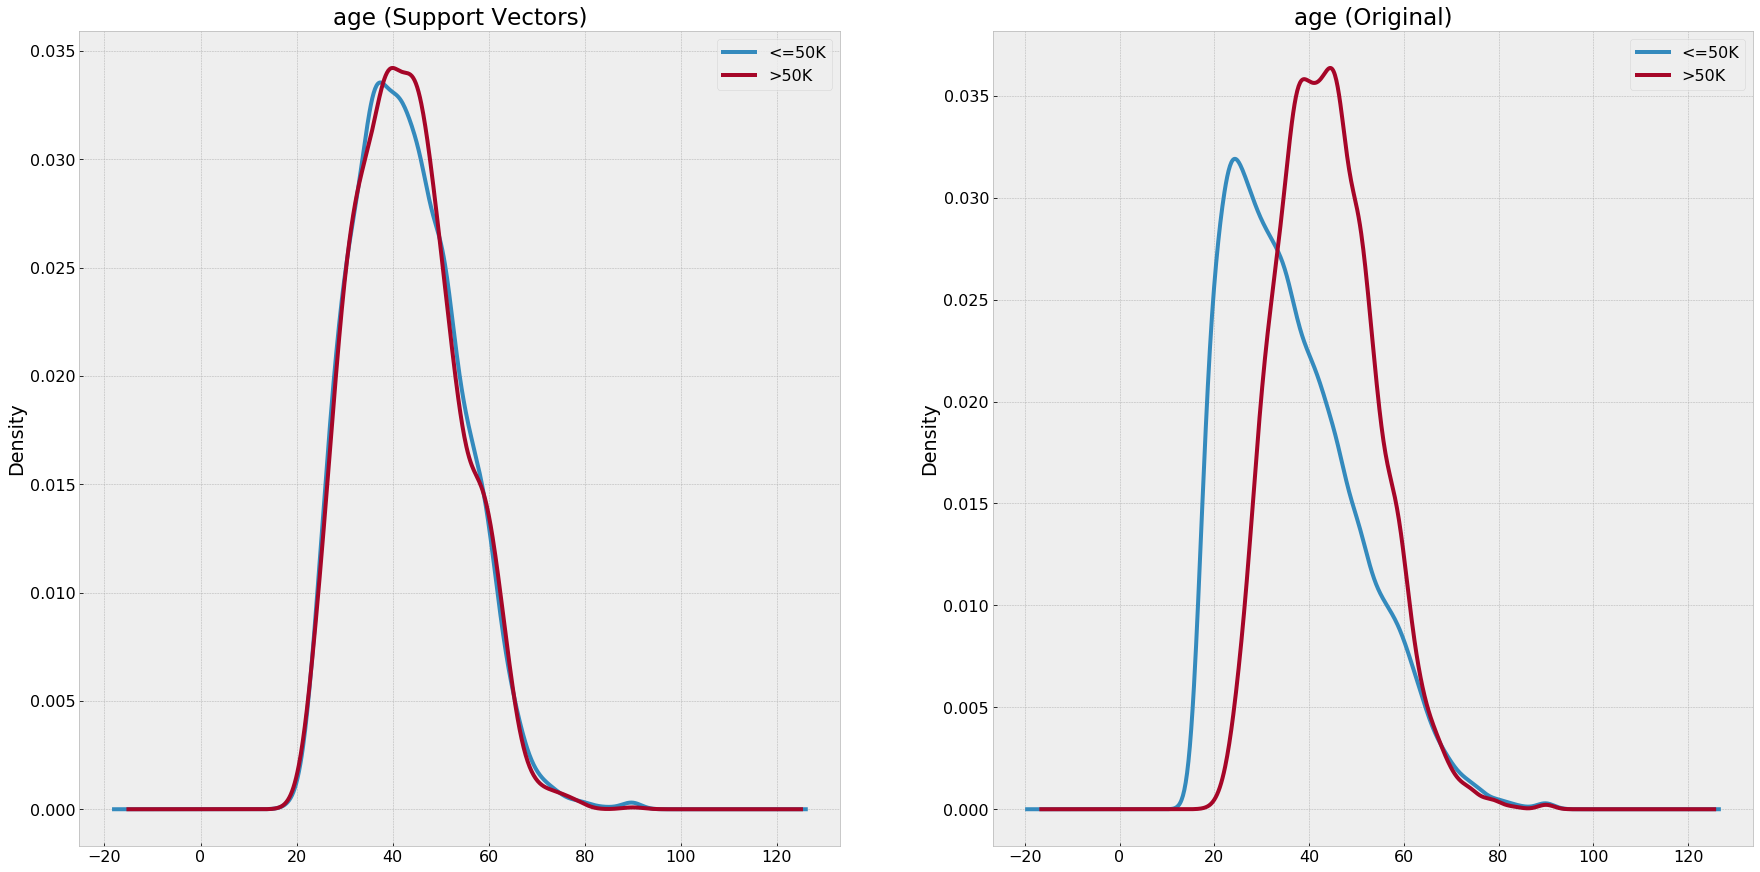

<Figure size 720x288 with 0 Axes>

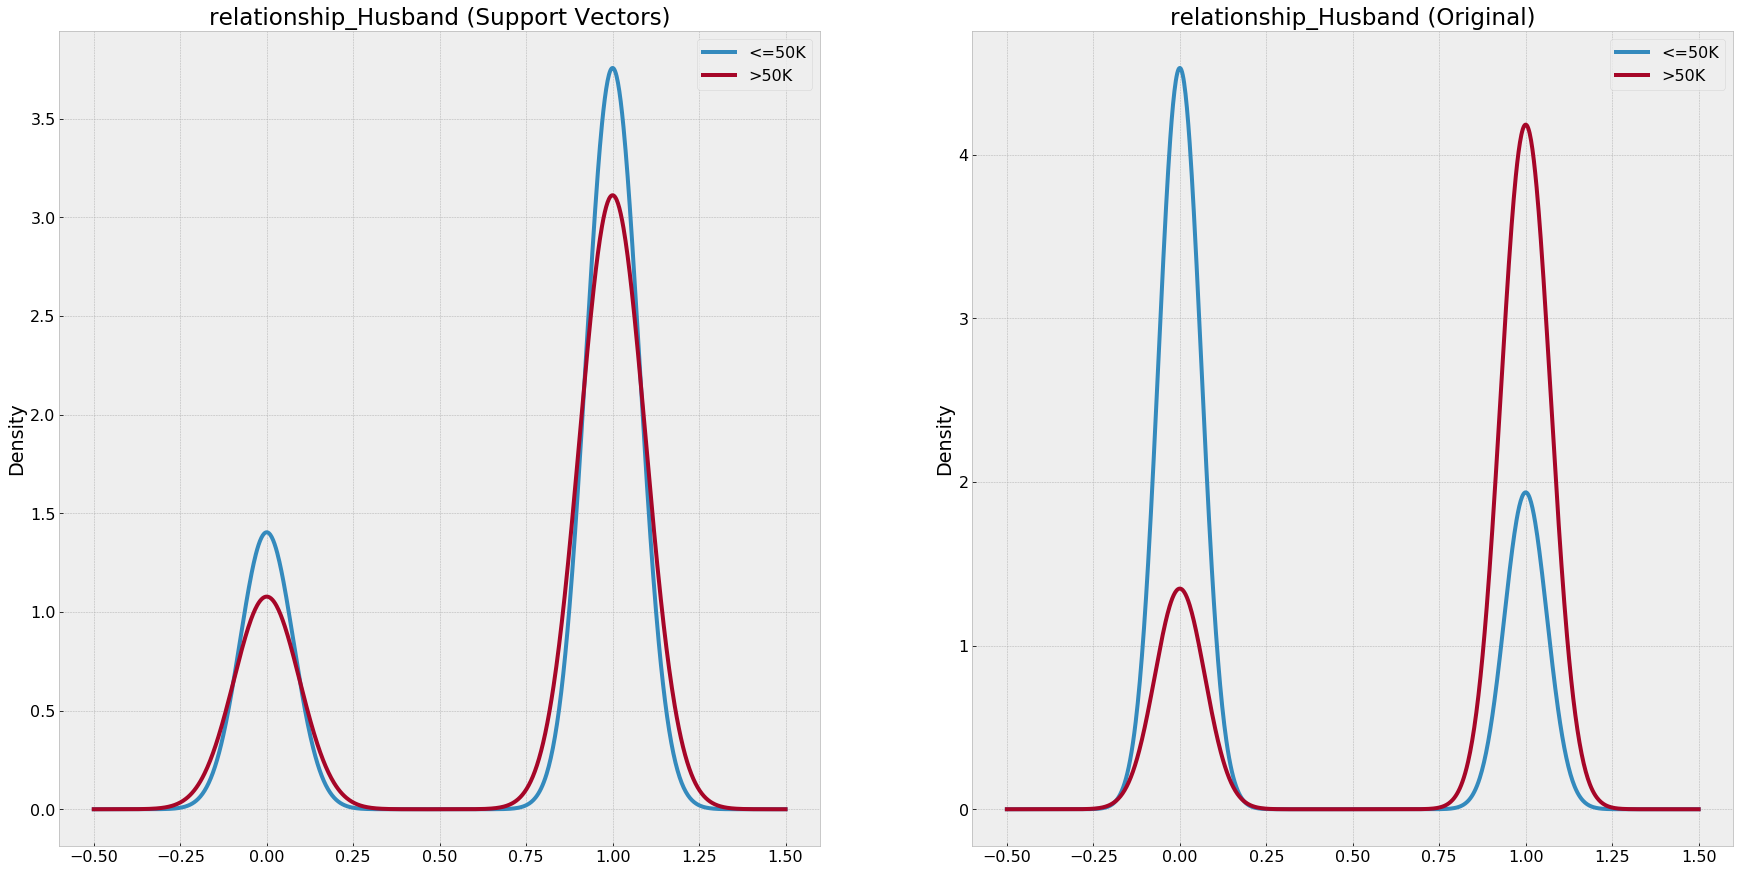

<Figure size 720x288 with 0 Axes>

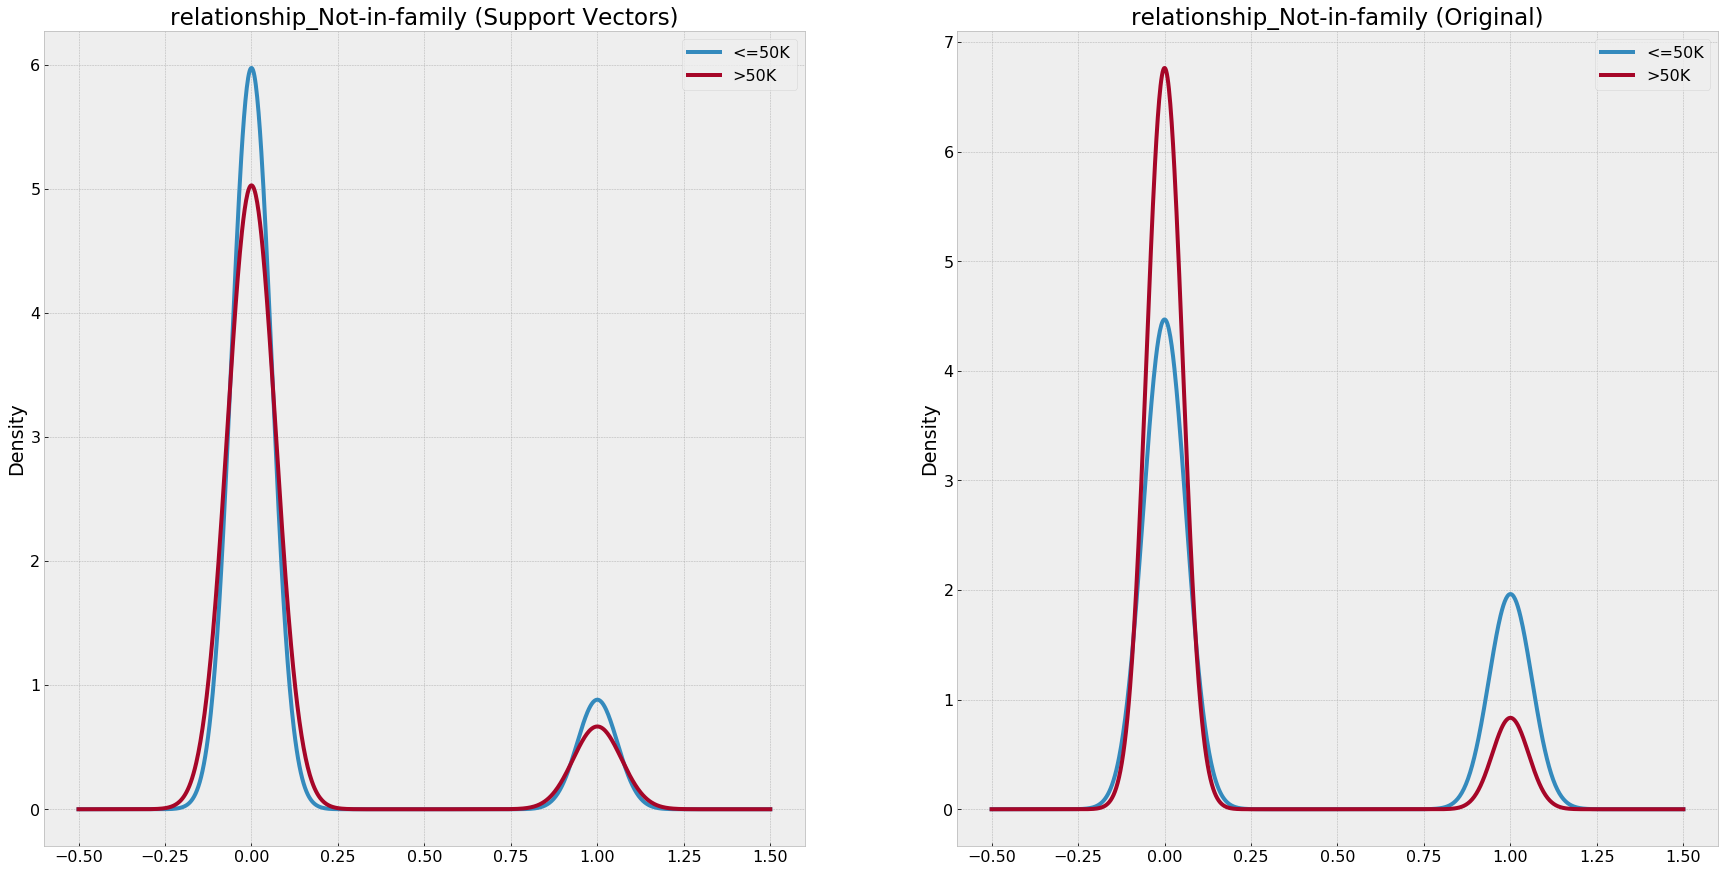

<Figure size 720x288 with 0 Axes>

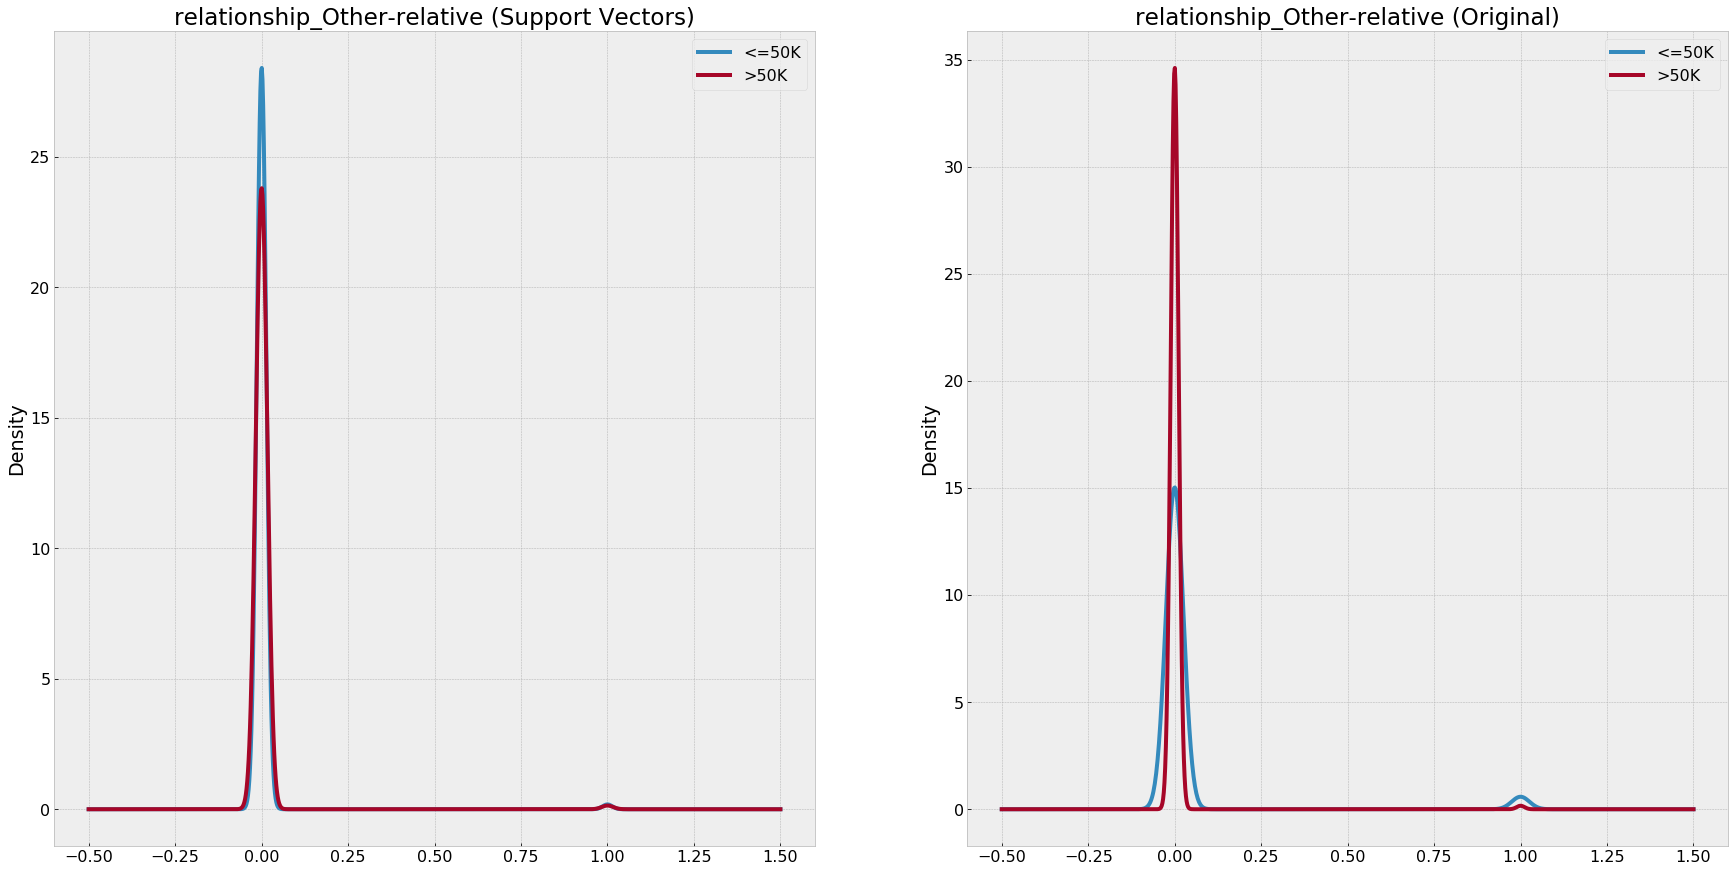

<Figure size 720x288 with 0 Axes>

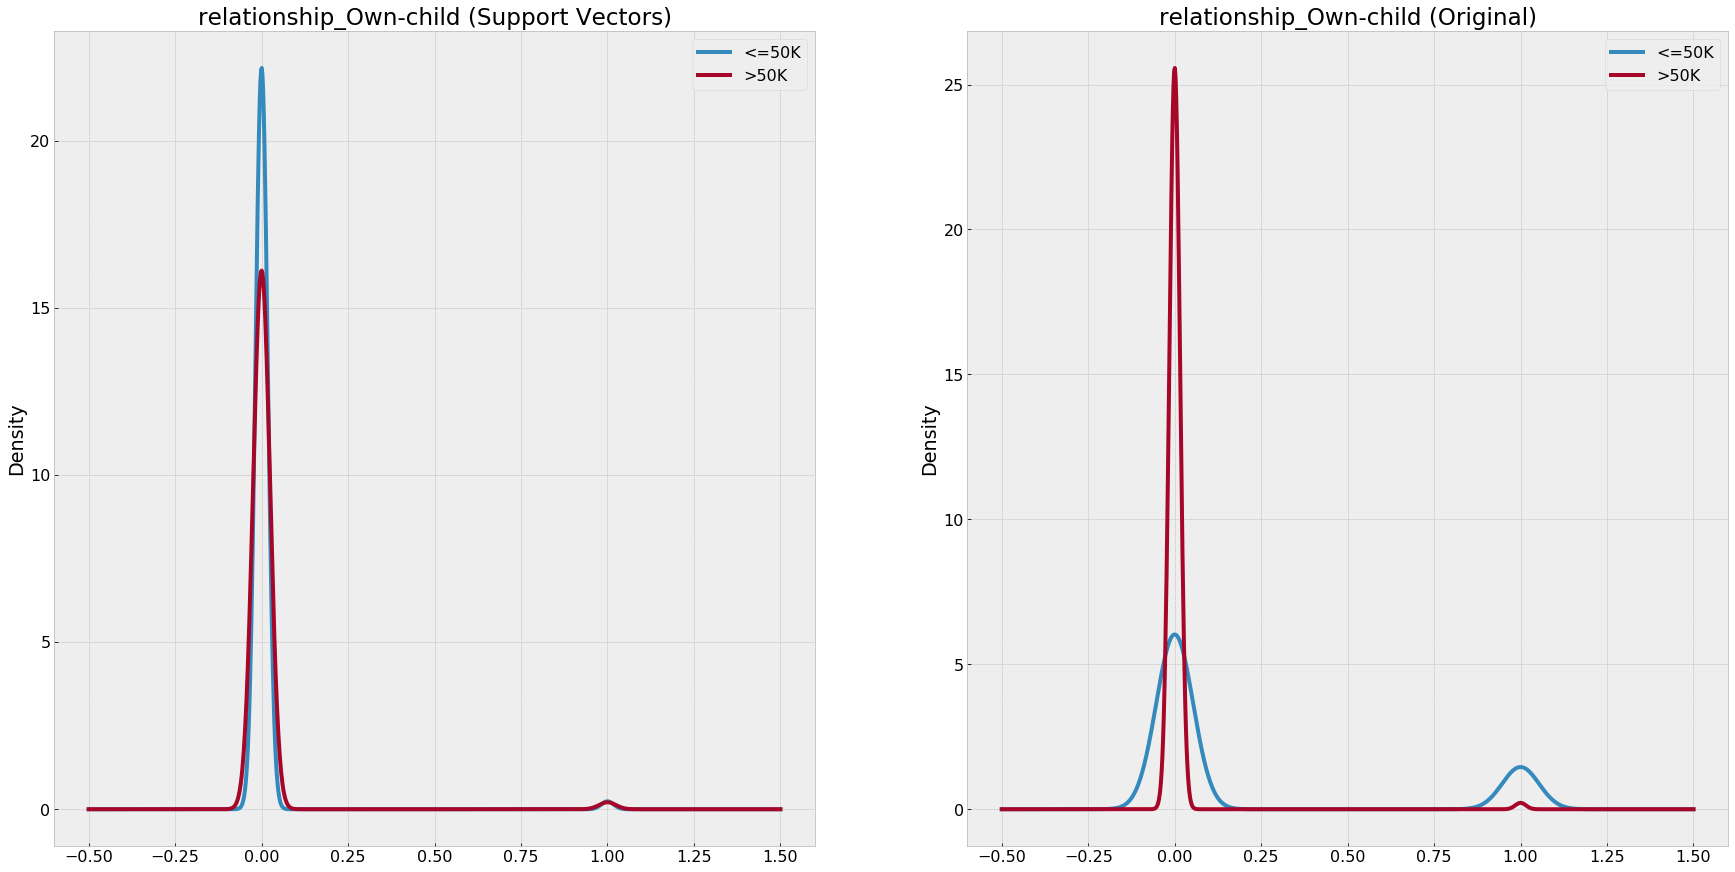

<Figure size 720x288 with 0 Axes>

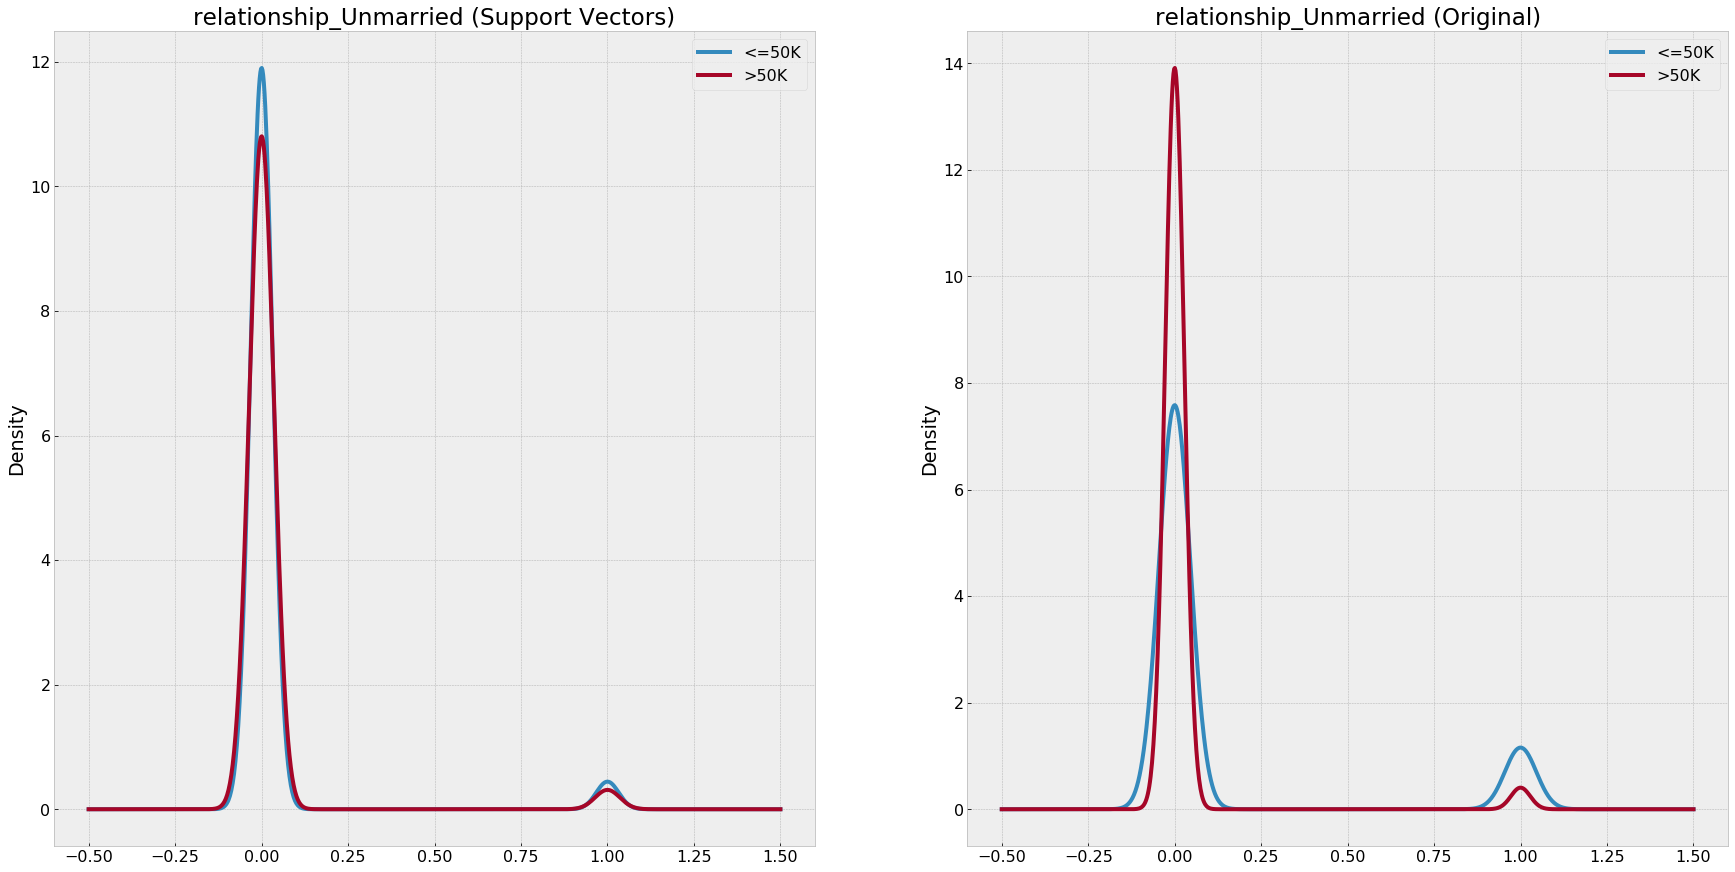

<Figure size 720x288 with 0 Axes>

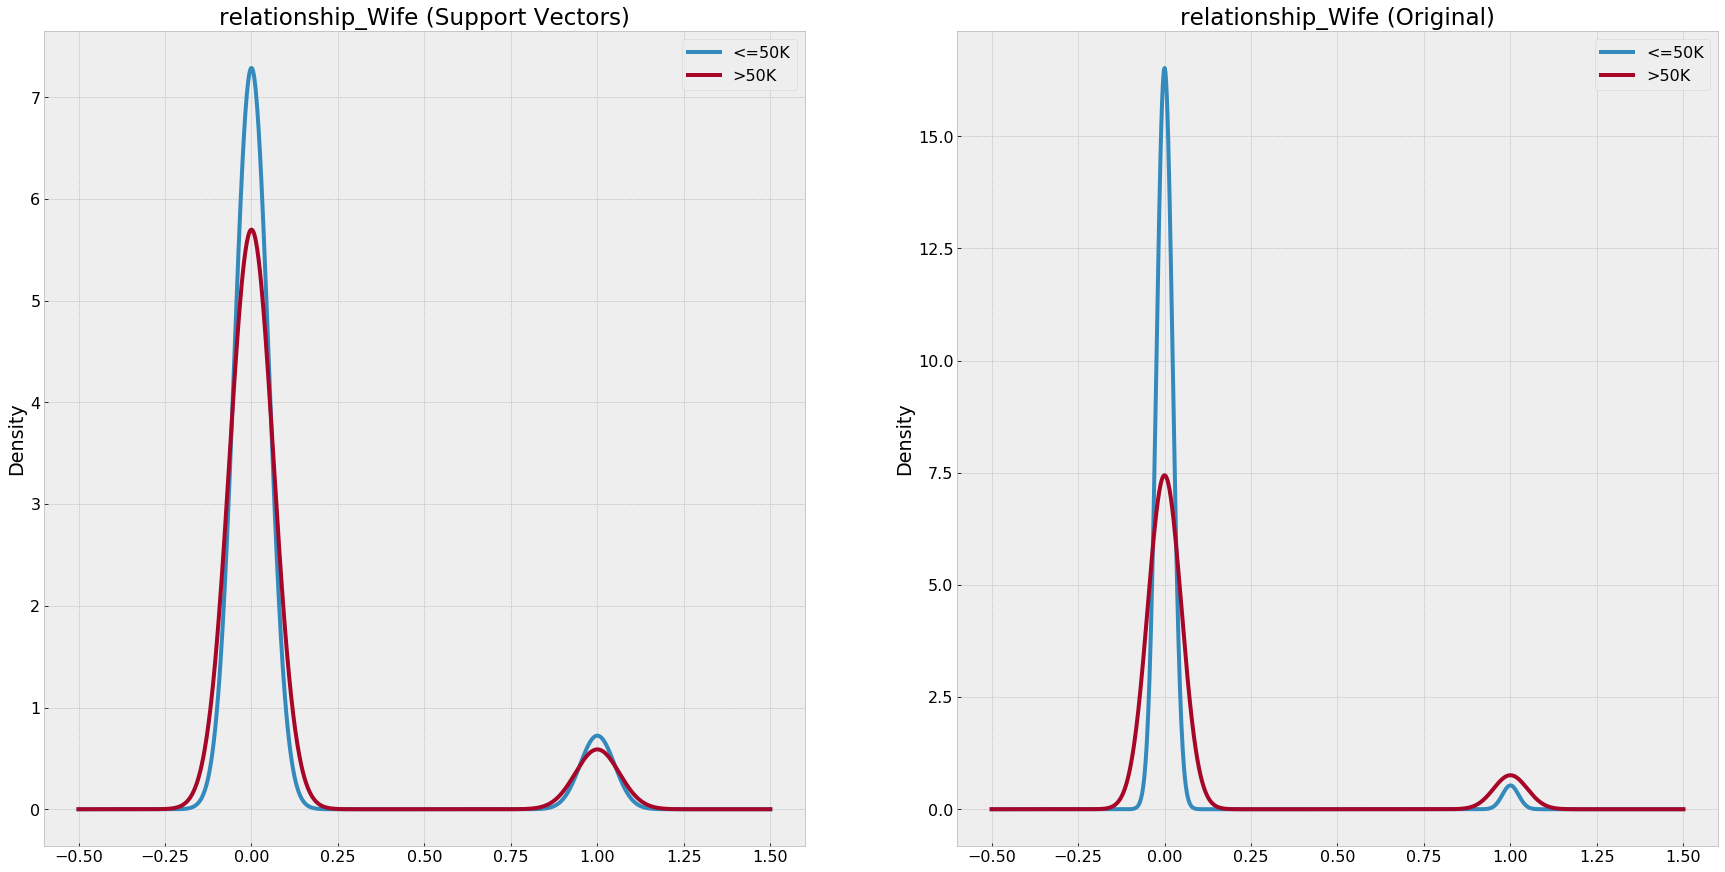

<Figure size 720x288 with 0 Axes>

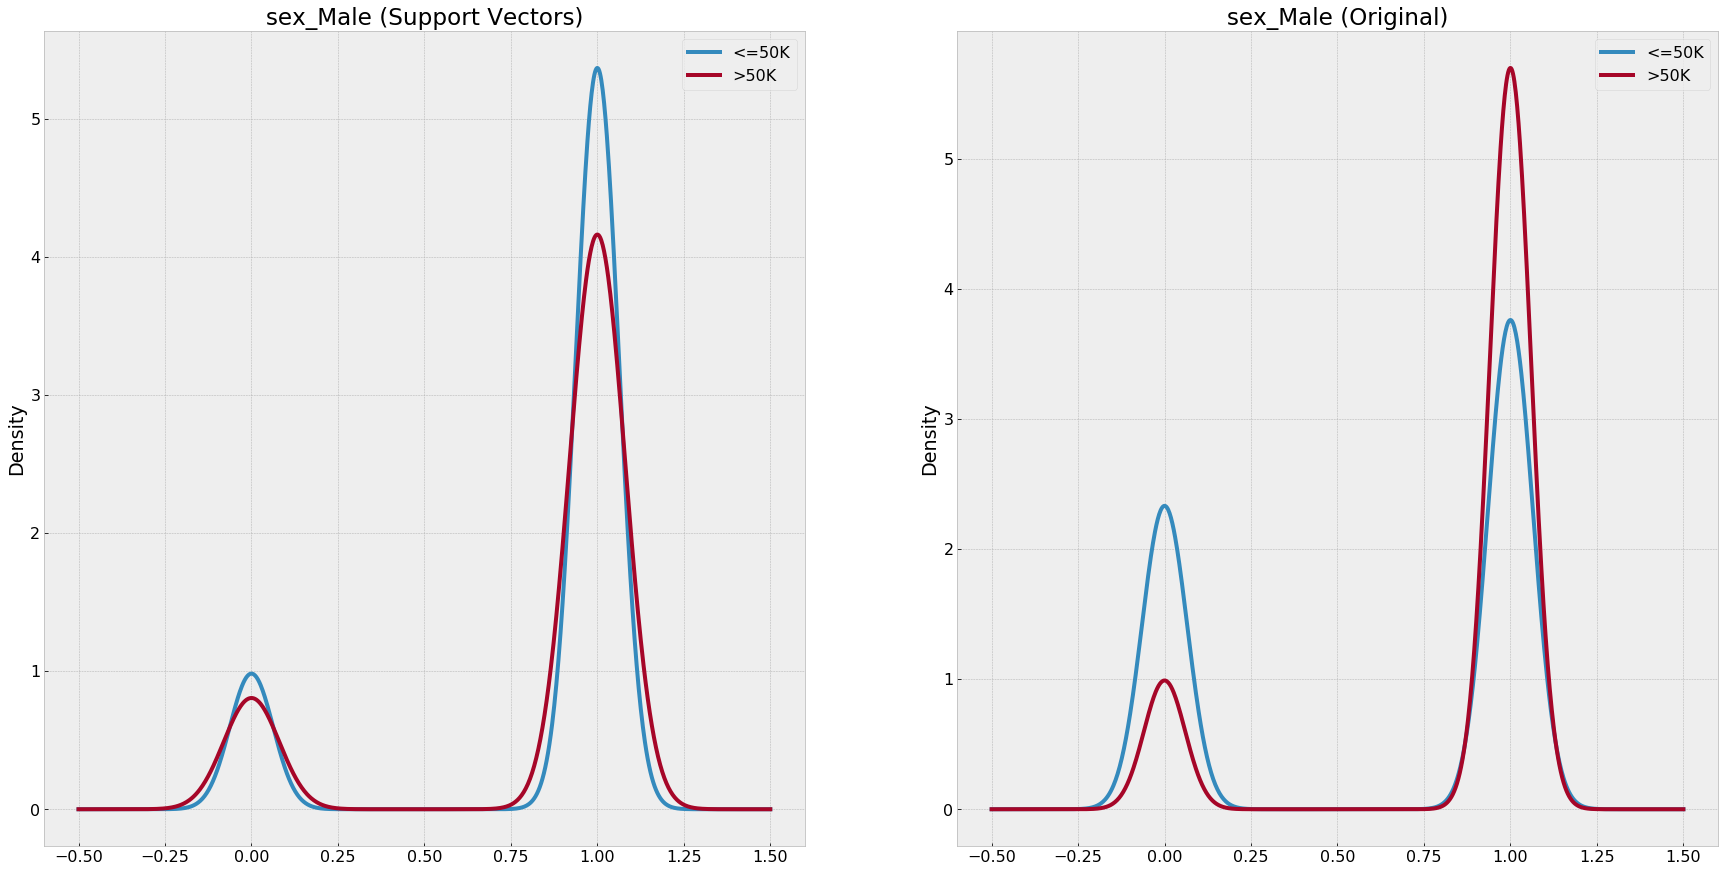

<Figure size 720x288 with 0 Axes>

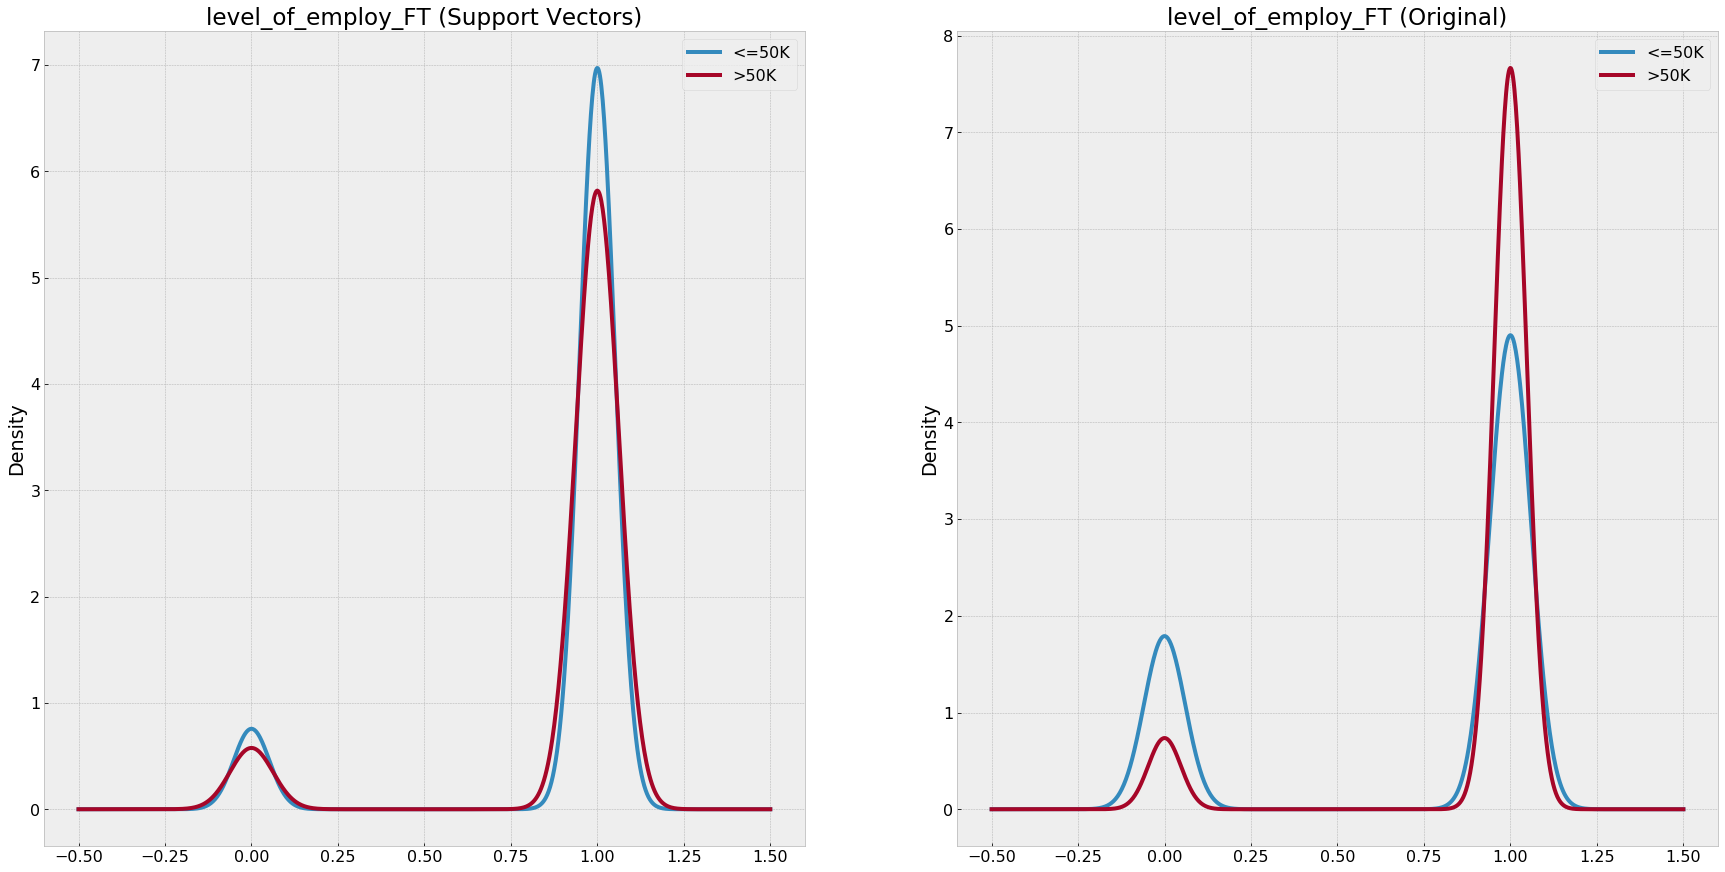

In [23]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4



# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'age', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'level_of_employ_FT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

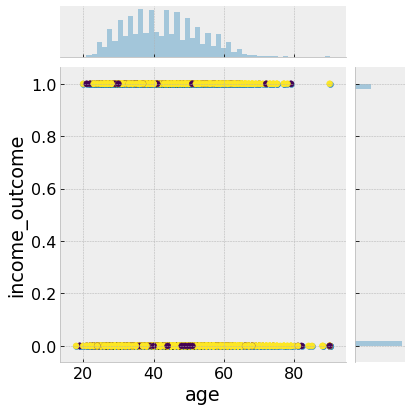

In [24]:
g = sns.jointplot('age','income_outcome',data=df_support) 
g.ax_joint.scatter(df_support.age,df_support.income_outcome, c=df_support.sex_Male)

In [25]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions


svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 
#svm_clf = SVC(C=10, kernel='rbf', gamma=10) #terrible scores and long compute times

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    svm_clf.fit(X_train_scaled, y_train)  

    y_hat = svm_clf.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t

    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1
    
    

====Iteration 0  ====

Accuracy:  0.8422277639235245 

f1_score: 0.6403940886699507 

precision_score: 0.729076790336497 

roc_auc_score: 0.7508533478351561 

Confusion Matrix: 

      0    1
0  4221  314
1   635  845 

Train Time:  34.96632048699999 s

====Iteration 1  ====

Accuracy:  0.8455527847049044 

f1_score: 0.6477057262040197 

precision_score: 0.7471566054243219 

roc_auc_score: 0.7538479509722145 

Confusion Matrix: 

      0    1
0  4232  289
1   640  854 

Train Time:  34.84558479900002 s

====Iteration 2  ====

Accuracy:  0.8465502909393183 

f1_score: 0.6632615833637359 

precision_score: 0.768385460693153 

roc_auc_score: 0.7609819893588803 

Confusion Matrix: 

      0    1
0  4183  274
1   649  909 

Train Time:  34.98064545999998 s



In [26]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

    t = time.process_time()
    
    svm_sgd.fit(X_train_scaled,y_train)
    yhat = svm_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.8337489609310058 

f1_score: 0.609984399375975 

precision_score: 0.7440532825880114 

roc_auc_score: 0.7285513554525079 

Confusion Matrix: 

      0    1
0  4233  269
1   731  782 

Train Time:  0.045081497000012405 s

====Iteration 1  ====

Accuracy:  0.8377389858686617 

f1_score: 0.6205287713841369 

precision_score: 0.7492957746478873 

roc_auc_score: 0.7351504131267926 

Confusion Matrix: 

      0    1
0  4241  267
1   709  798 

Train Time:  0.15761405699998932 s

====Iteration 2  ====

Accuracy:  0.8473815461346633 

f1_score: 0.6357142857142856 

precision_score: 0.7492984097287184 

roc_auc_score: 0.7466563299752172 

Confusion Matrix: 

      0    1
0  4296  268
1   650  801 

Train Time:  0.16717222599999104 s



In [27]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    log_sgd.fit(X_train_scaled,y_train)
    yhat = log_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.8352452202826268 

f1_score: 0.5963340122199593 

precision_score: 0.7484662576687117 

roc_auc_score: 0.7206951424710255 

Confusion Matrix: 

      0    1
0  4292  246
1   745  732 

Train Time:  0.23439965199997914 s

====Iteration 1  ====

Accuracy:  0.8270989193682461 

f1_score: 0.5833333333333334 

precision_score: 0.7436159346271706 

roc_auc_score: 0.7120459748755251 

Confusion Matrix: 

      0    1
0  4247  251
1   789  728 

Train Time:  0.2387743400000204 s

====Iteration 2  ====

Accuracy:  0.8342477140482129 

f1_score: 0.5854469854469855 

precision_score: 0.7394957983193278 

roc_auc_score: 0.7150763375477063 

Confusion Matrix: 

      0    1
0  4314  248
1   749  704 

Train Time:  0.22976318299998866 s



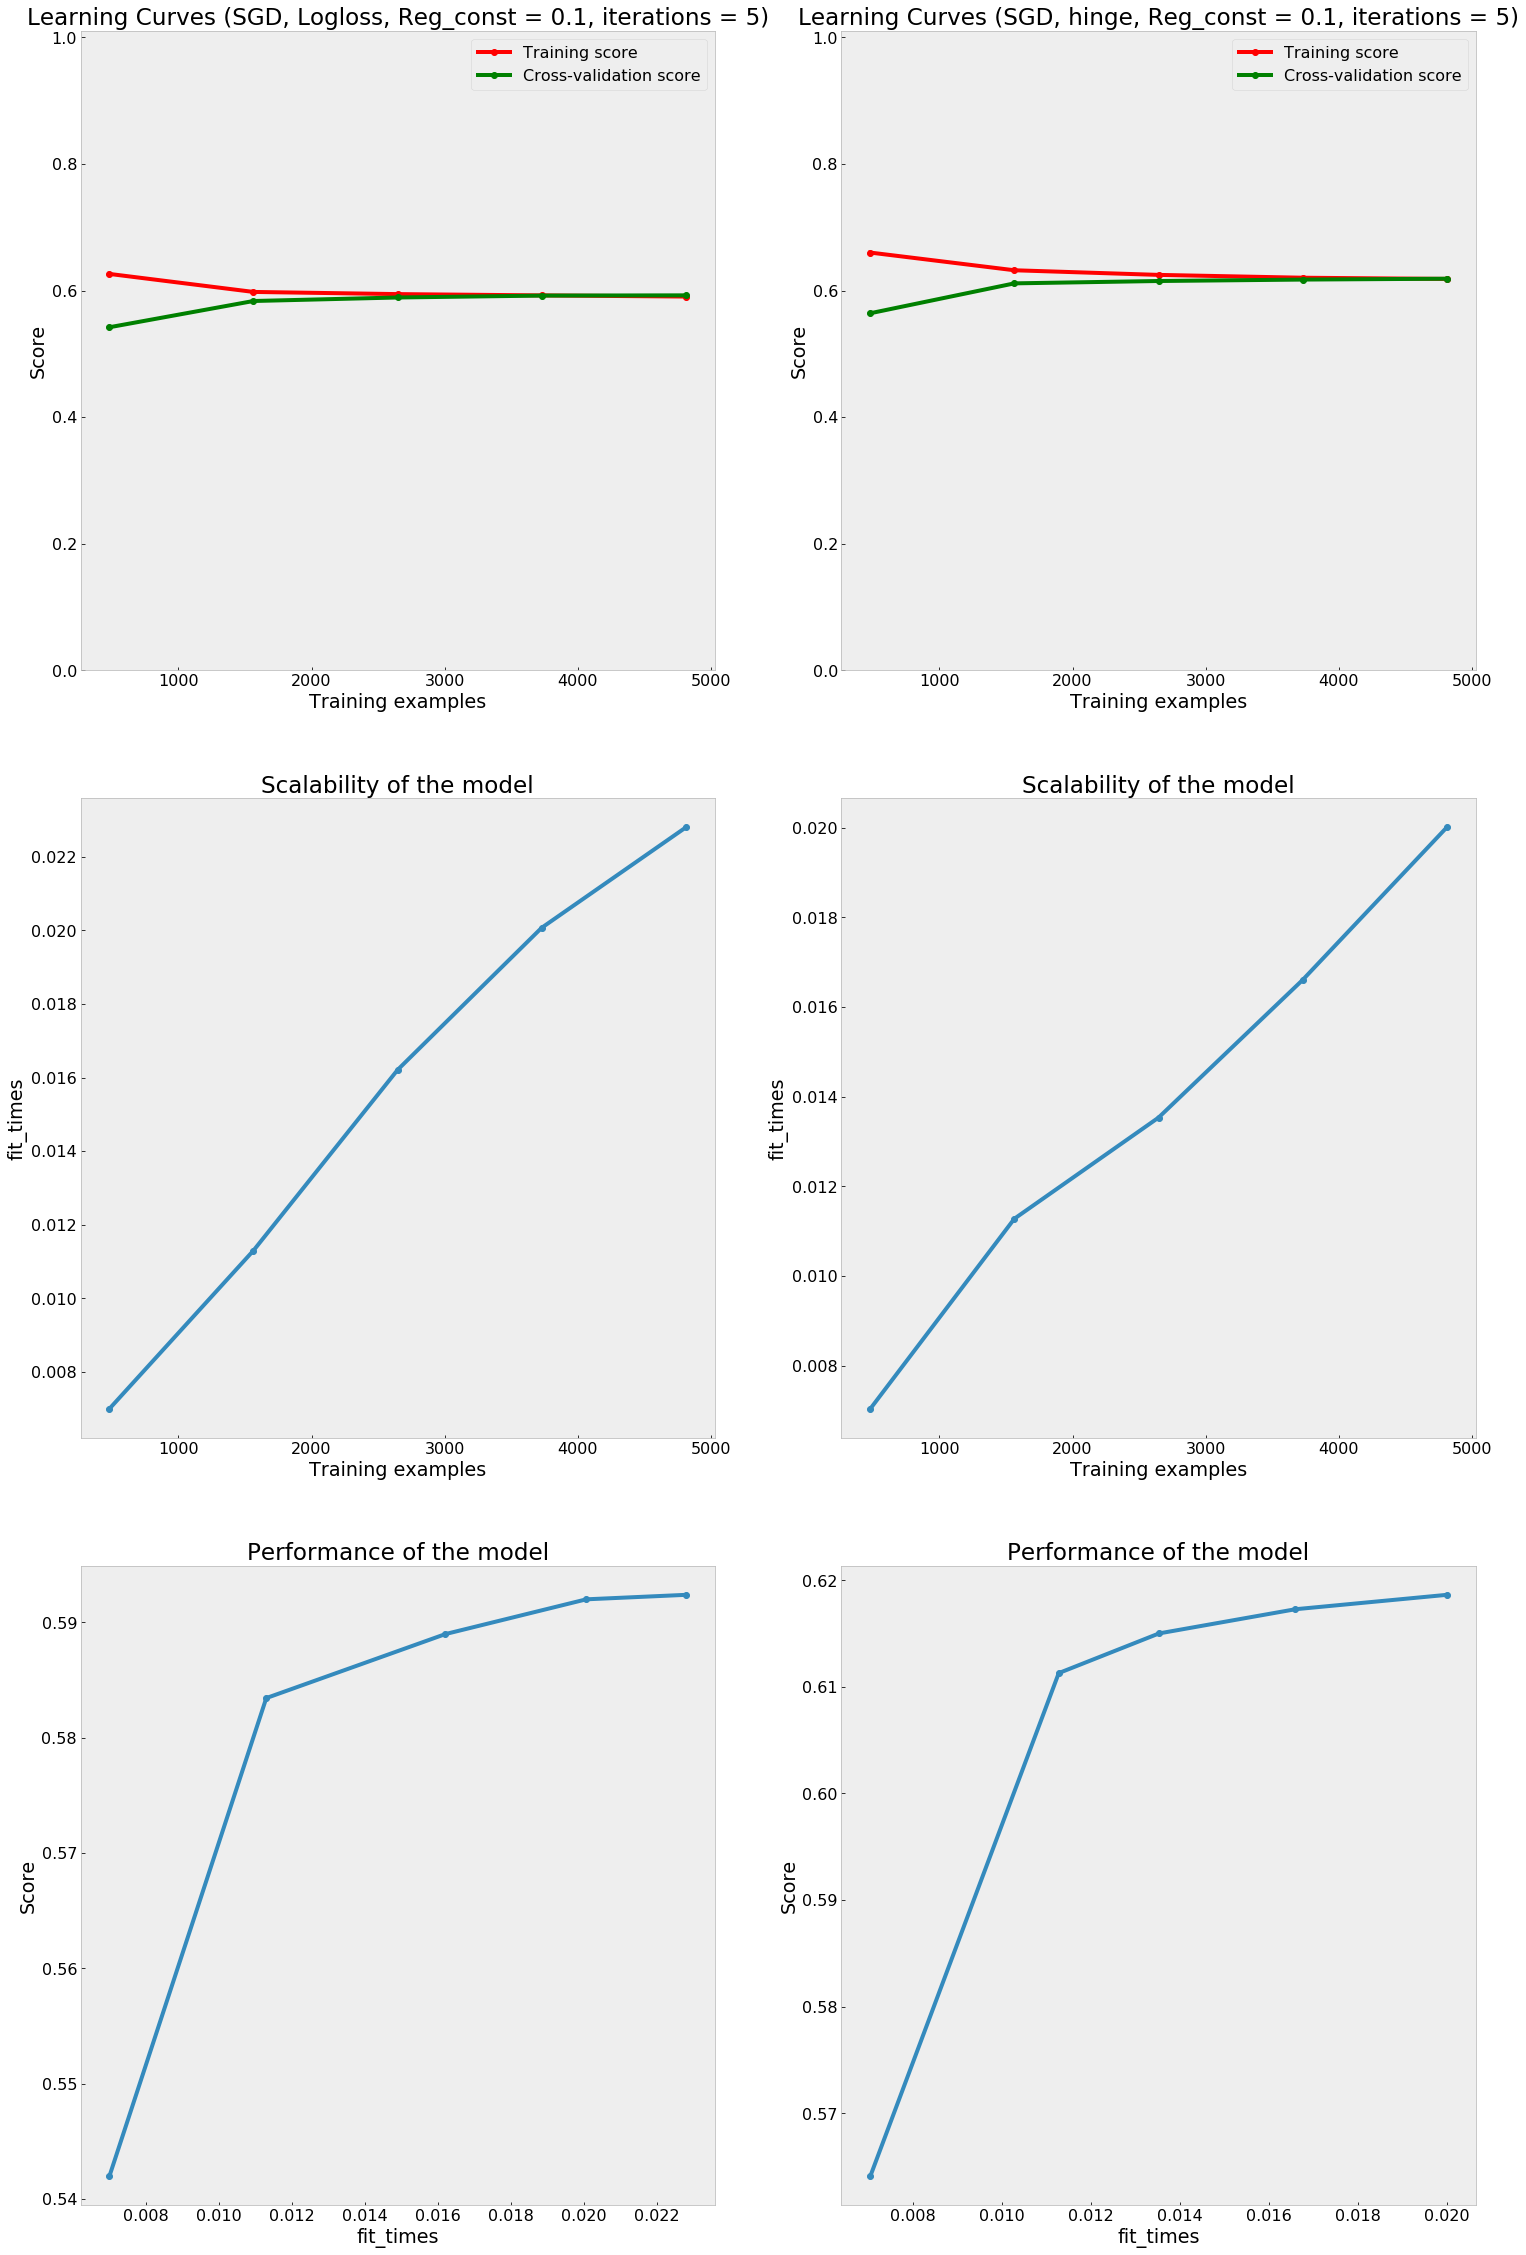

In [28]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-ridge-regression-py
#https://scikit-learn.org/stable/modules/model_evaluation.html



def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring=None):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()

    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves (SGD, Logloss, Reg_const = 0.1, iterations = 5)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
regularize_const = 0.1
iterations = 5
estimator = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4, scoring = 'f1')


title = r"Learning Curves (SGD, hinge, Reg_const = 0.1, iterations = 5)"

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
regularize_const = 0.1
iterations = 5
estimator = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4, scoring = 'f1')

plt.show()

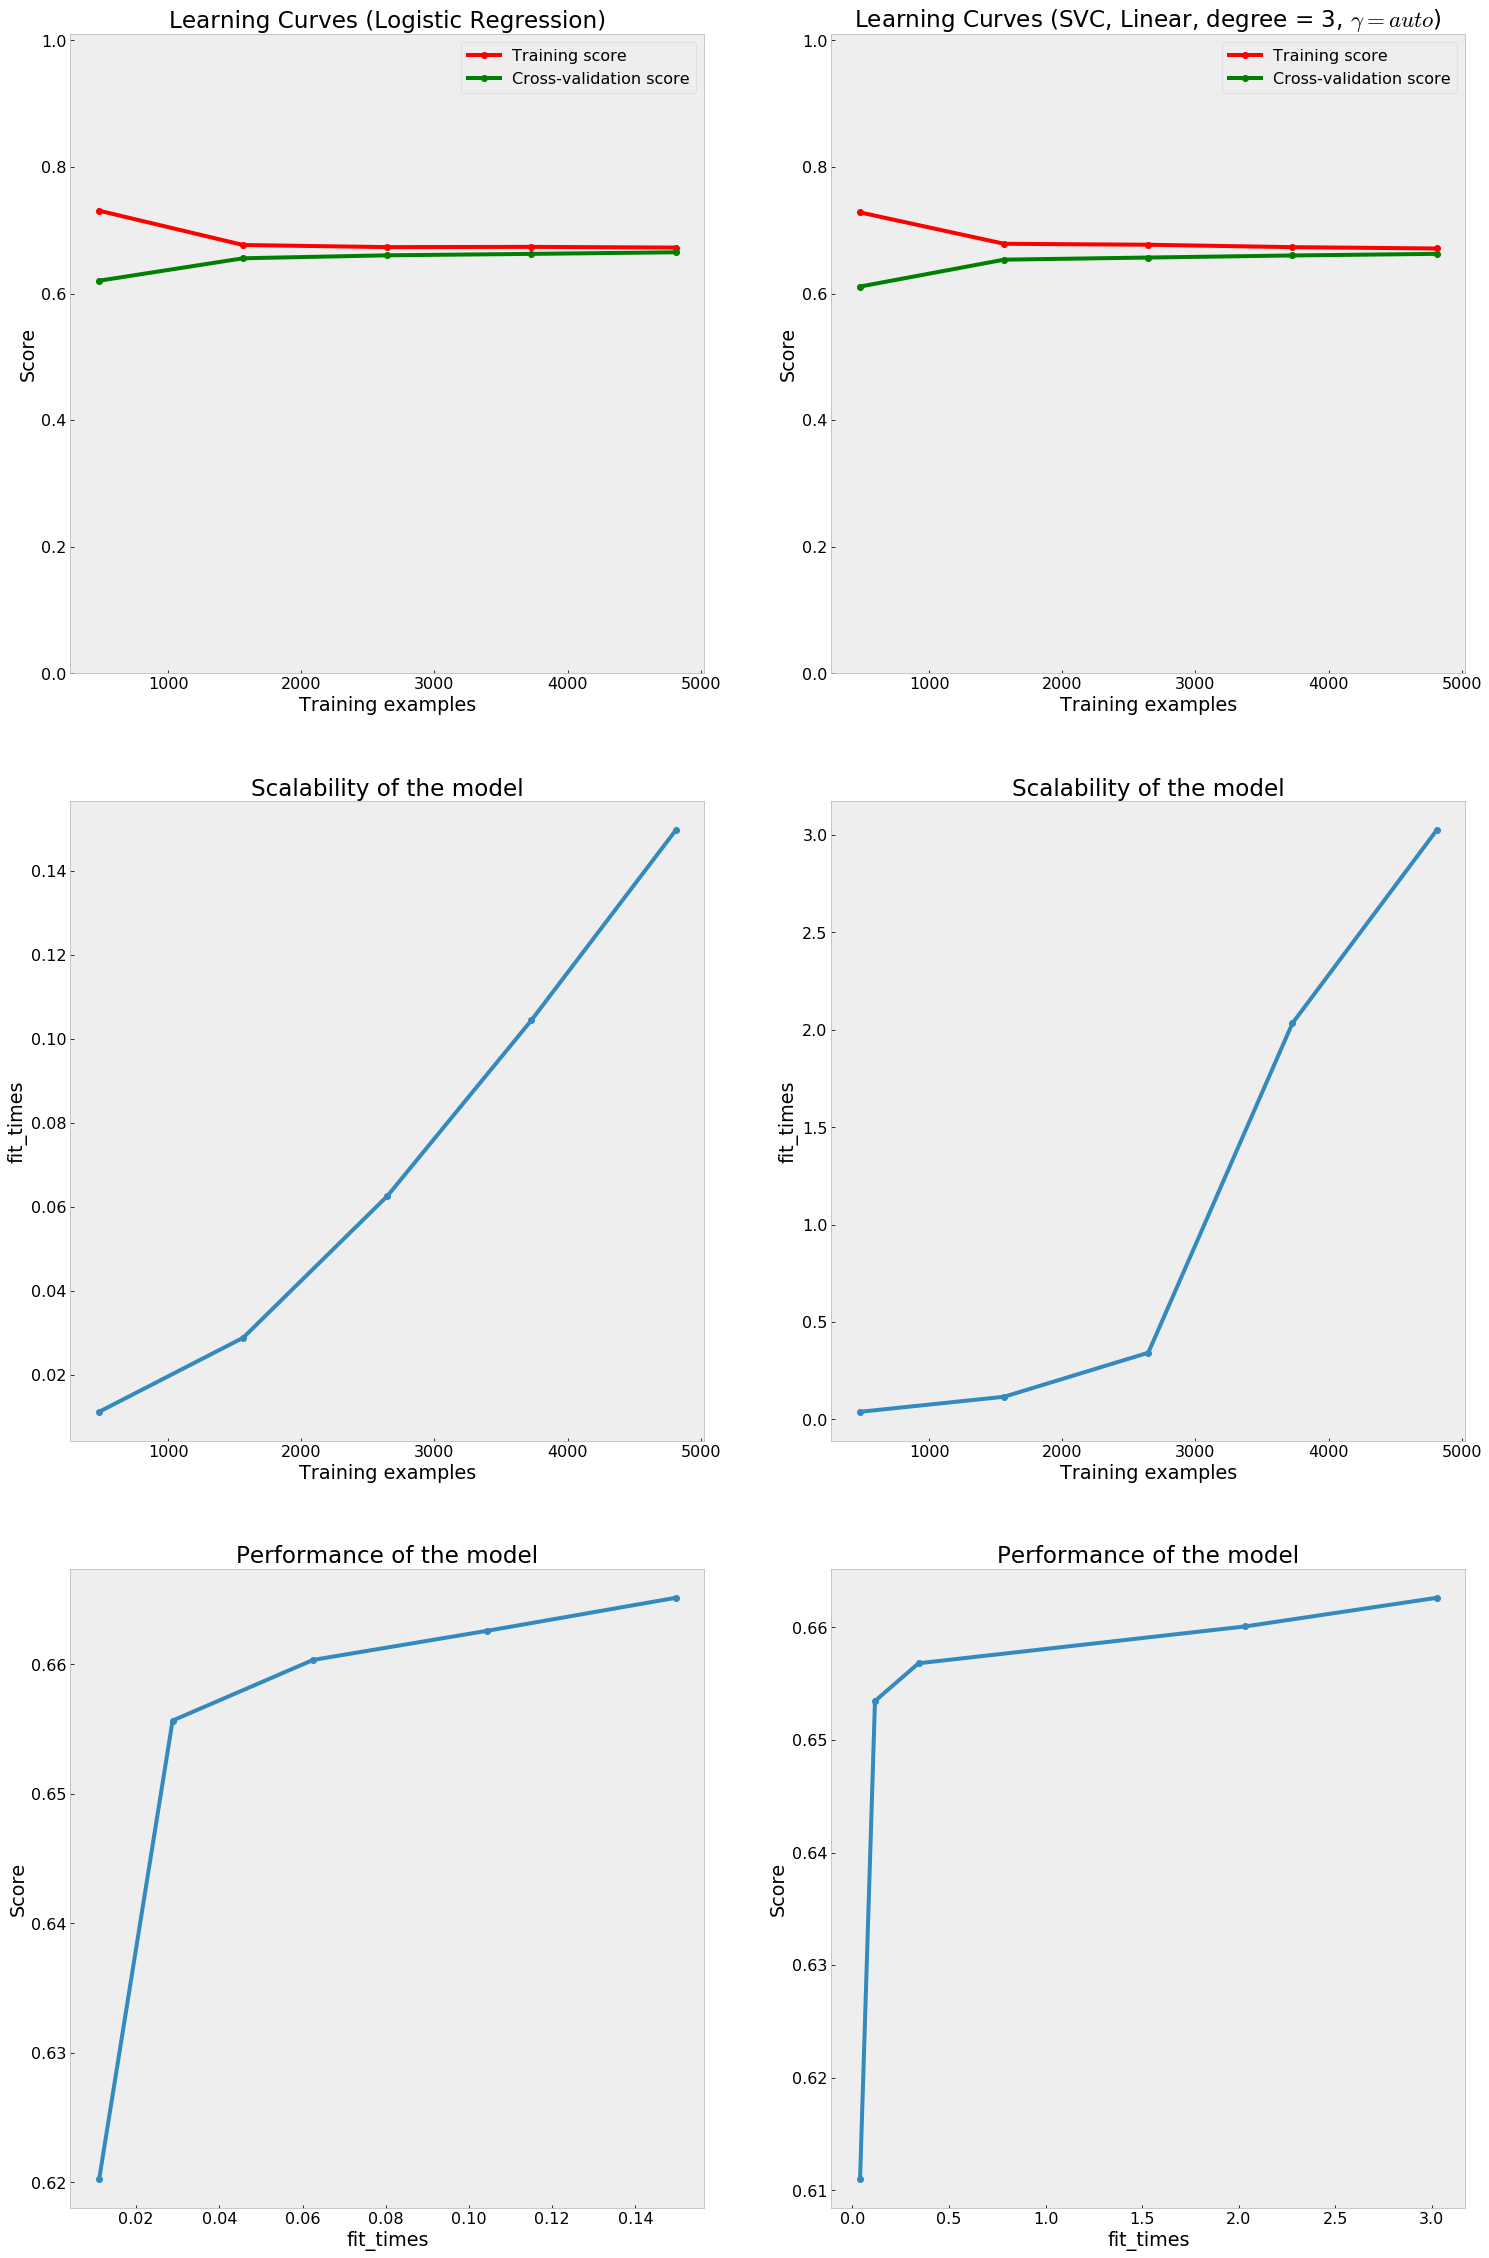

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves (Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
estimator = lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4, scoring = 'f1')


title = r"Learning Curves (SVC, Linear, degree = 3, $\gamma=auto$)"

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
estimator = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4, scoring = 'f1')

plt.show()

Rubric Sections

https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome
Create Models: 

50 PTS 

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

Model Advantages: 

10 PTS 

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

Interpret Feature Importance: 

30 PTS 

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

Interpret Support Vectors: 

10 PTS 

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.